In [ ]:
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utilities.data_loader import load_csv
from utilities.data_processor import print_missing_counts
from utilities.data_visualizer import (plot_heatmap, plot_barplot, plot_histogram, plot_count, plot_scatter)

In [ ]:
output_path = os.path.join('output')

# Load csv dataset to a pandas DataFrame
df = load_csv('input/sleep_cycle_productivity.csv')

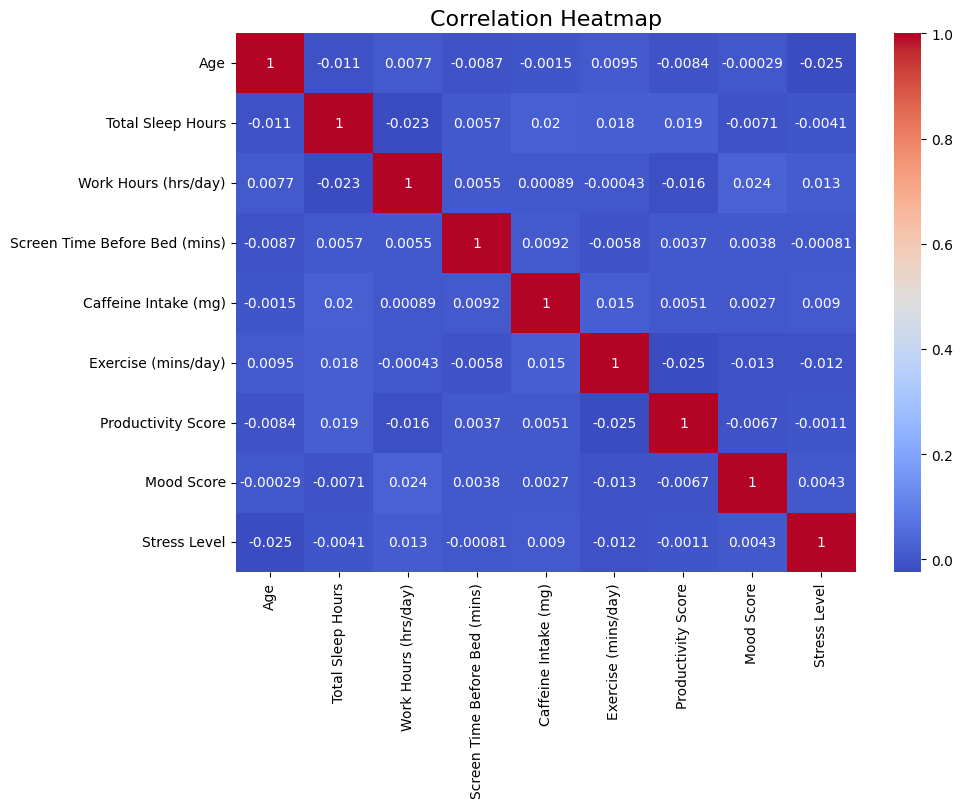

In [7]:
# Correlation matrix
test_corr = df[['Age', 'Total Sleep Hours', 'Work Hours (hrs/day)', 'Screen Time Before Bed (mins)', 'Caffeine Intake (mg)', 'Exercise (mins/day)',  'Productivity Score', 'Mood Score', 'Stress Level']].corr()

plot_heatmap(df=test_corr, title='Correlation Heatmap', figsize=(10, 7), cmap='coolwarm', annot=True)

In [8]:
# Adding additional dimensions such as Age group and Exercises duration group.
age_bins = [18, 30, 45, 60, np.inf]
age_labels = ['18-30', '31-45', '46-60', '60+']
exercise_duration_bins = [0, 20, 40, 60, np.inf]
exercise_duration_labels = ['< 20', '20-40', '40-60', '> 60']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['exerciseDurationGroup'] = pd.cut(df['Exercise (mins/day)'], bins=exercise_duration_bins, labels=exercise_duration_labels, right=False)

In [9]:
# Distribution of observations by Age group and Gender
df[['AgeGroup', 'Gender']].value_counts()

AgeGroup  Gender
46-60     Male      622
          Other     604
31-45     Female    600
          Male      589
46-60     Female    587
31-45     Other     567
18-30     Male      507
          Female    488
          Other     436
Name: count, dtype: int64

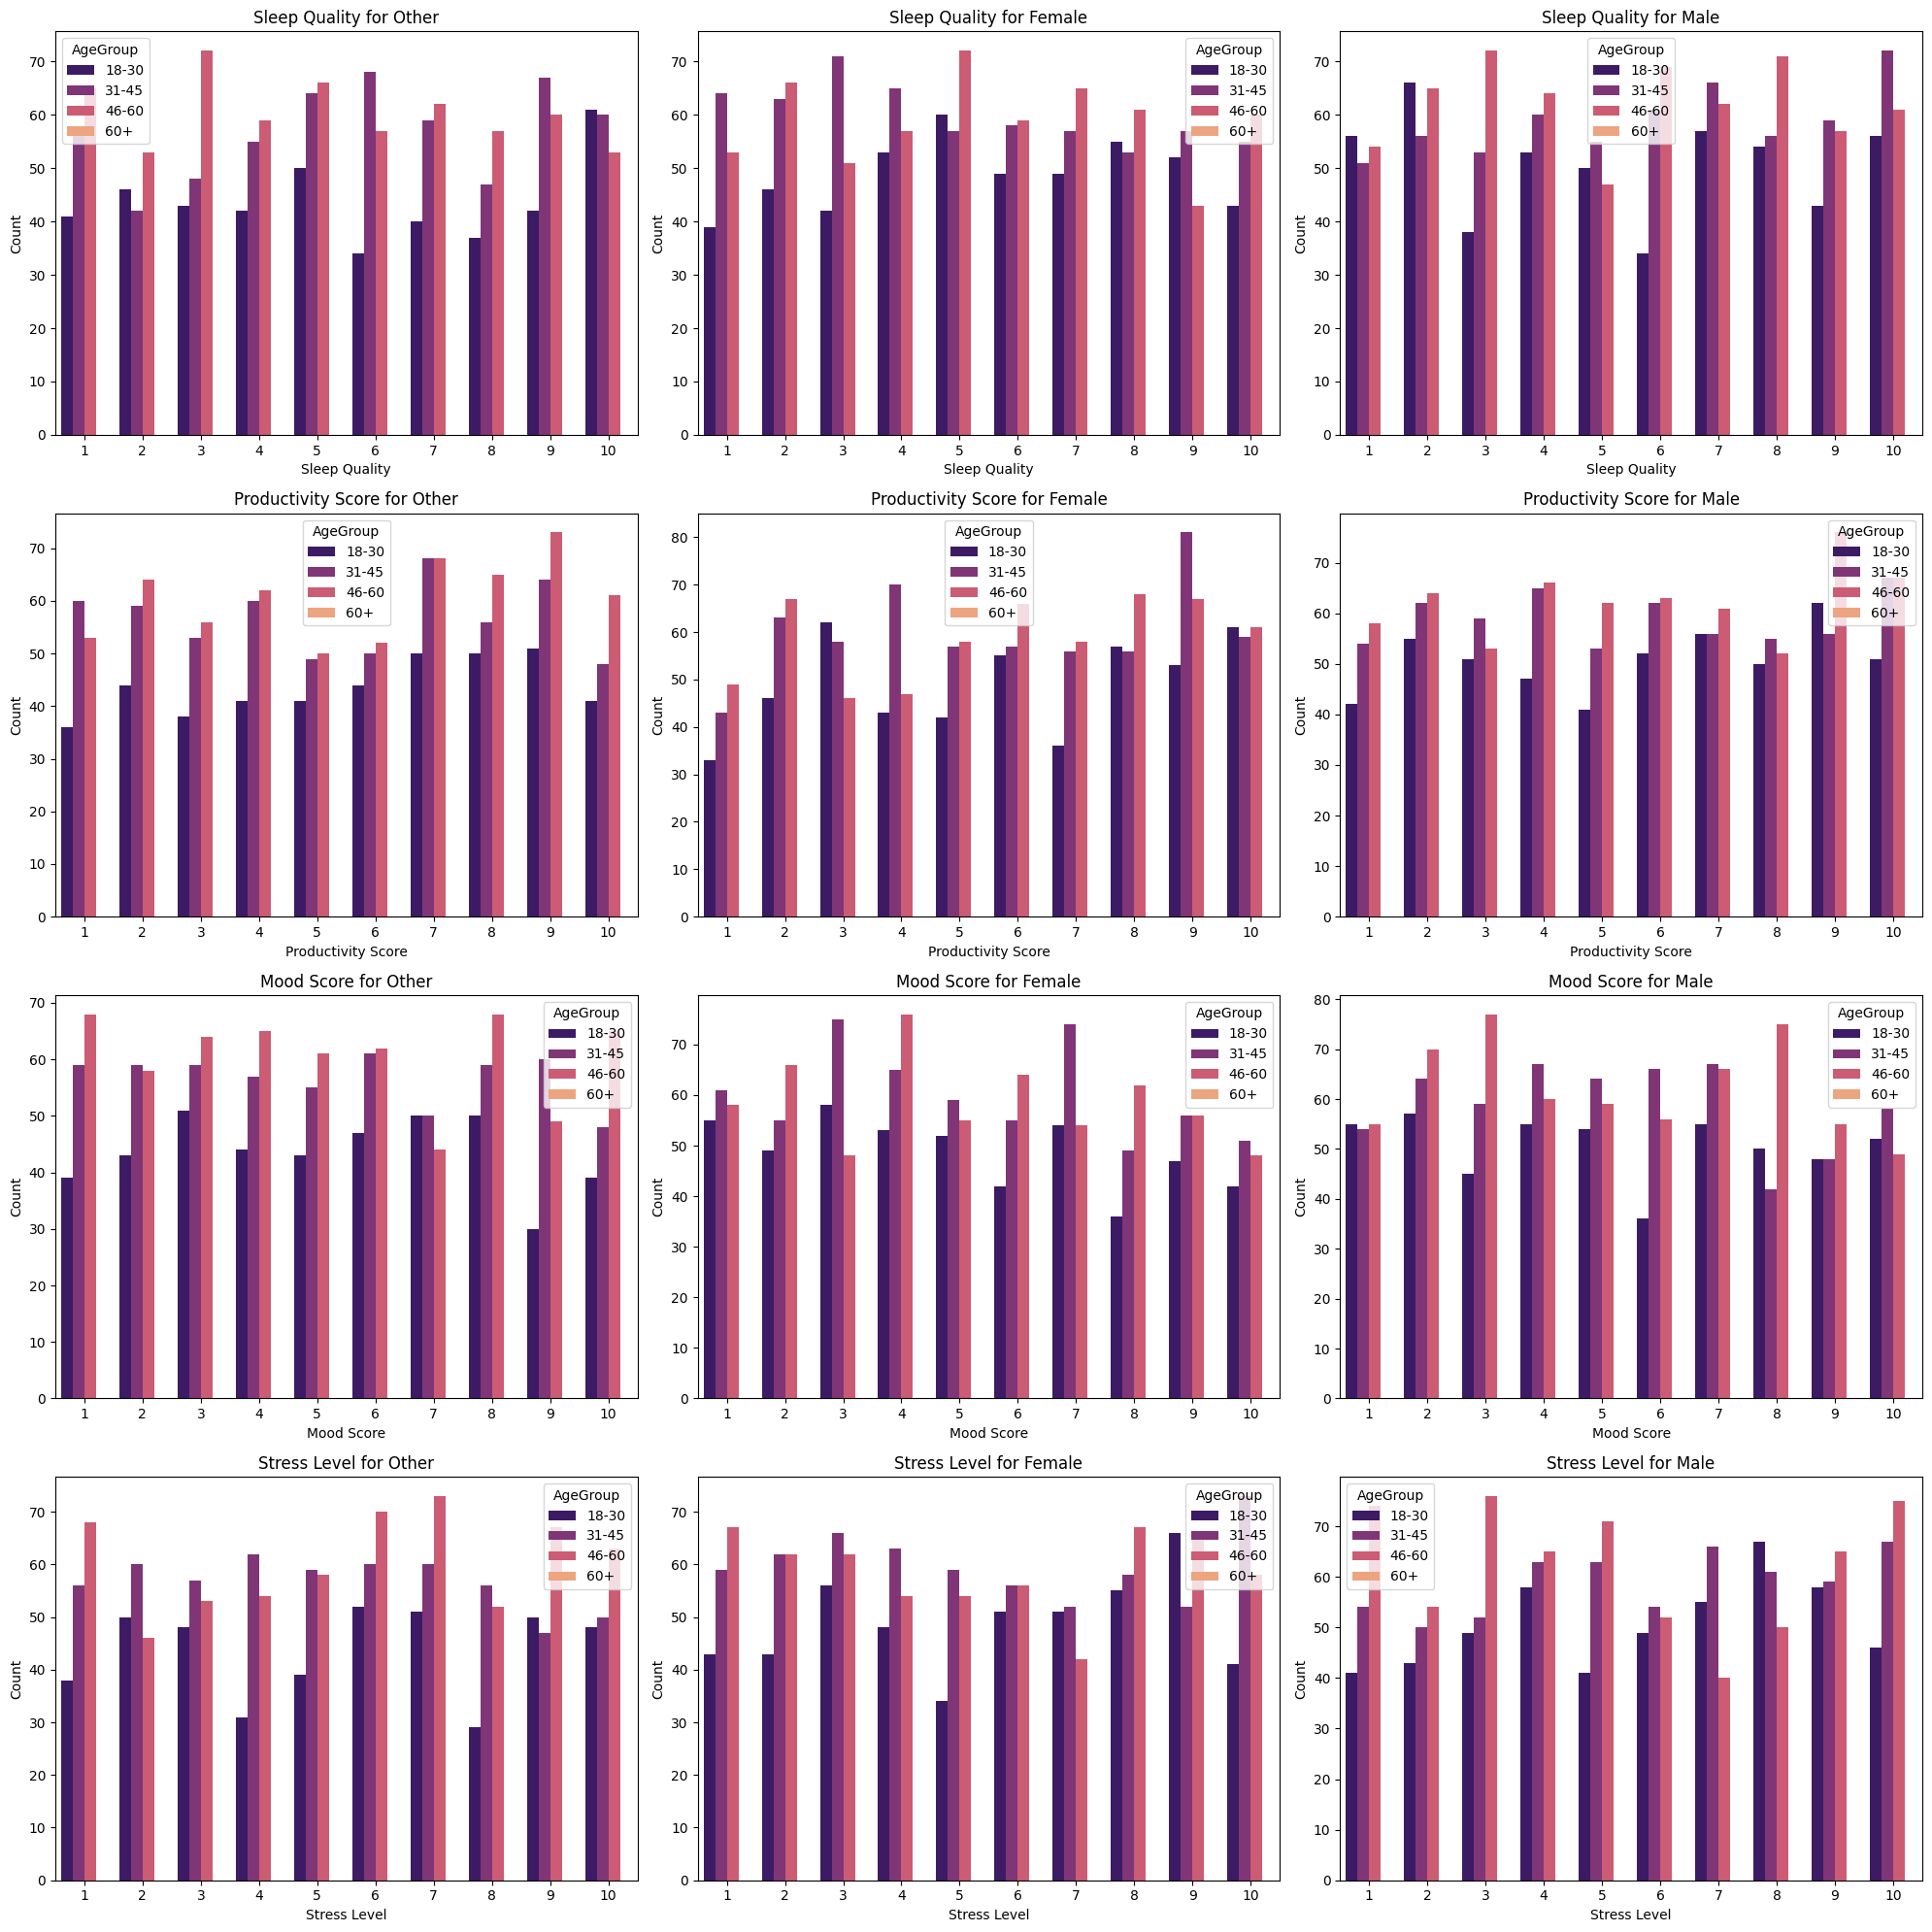

In [ ]:
# Main Scores Distribution by Gender and Age groups
metrics = ['Sleep Quality','Productivity Score', 'Mood Score', 'Stress Level']
genders = df['Gender'].unique()
fig, axes = plt.subplots(nrows=len(metrics), ncols=len(genders), figsize=(20, 20))

axes = axes.flatten()

for i, metric in enumerate(metrics):
    for j, gender in enumerate(genders):
        ax = axes[i * len(genders) + j]
        plot_count(
            df=df[df['Gender'] == gender],
            x=metric,
            title=f'{metric} for {gender}',
            x_label=metric,
            y_label='Count',
            ax=ax,
            hue='AgeGroup',
            palette='magma'
        )
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'Main_Scores_Distribution_by_Gender_and_age_groups.png'))

C:\Users\evojt\AppData\Local\Temp\ipykernel_31364\1477966987.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sleep_duration = df.groupby(['AgeGroup', 'Gender'])['Total Sleep Hours'].mean().reset_index()


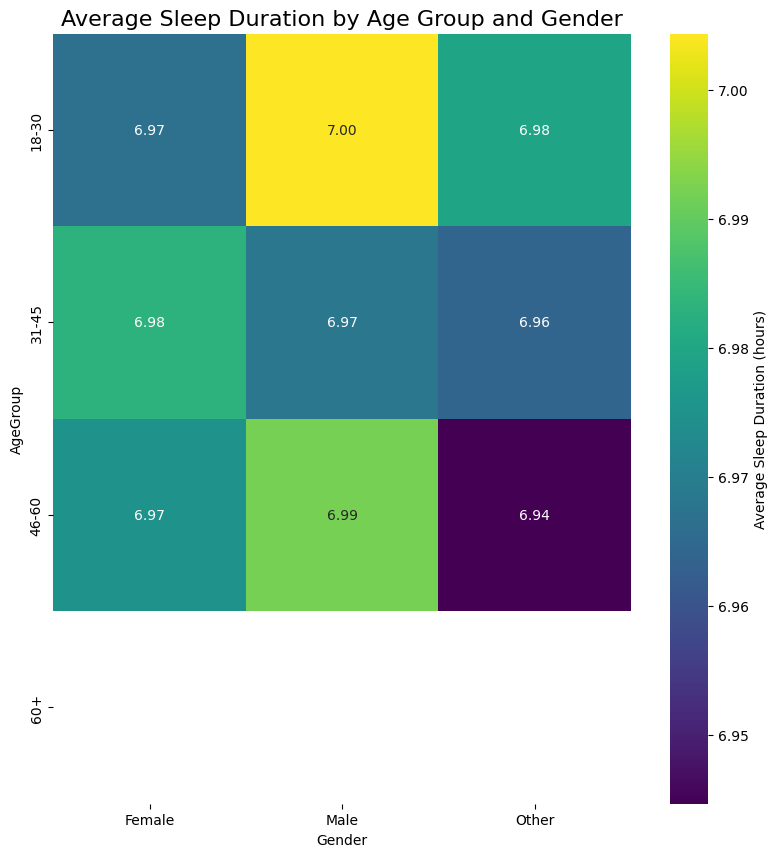

In [11]:
# Get average sleep values per Age groups and Gender
average_sleep_duration = df.groupby(['AgeGroup', 'Gender'])['Total Sleep Hours'].mean().reset_index()
average_sleep_duration.columns = ['AgeGroup', 'Gender', 'AverageSleepDuration']

heatmap_data = average_sleep_duration.pivot(index='AgeGroup', columns='Gender', values='AverageSleepDuration')

# Getting max and min values for a heatmap
vmax = max(heatmap_data.max())
vmin = min(heatmap_data.min())

plot_heatmap(df=heatmap_data, 
             figsize=(10, 10),
             title='Average Sleep Duration by Age Group and Gender',
             annot=True, 
             fmt='.2f',
             cmap='viridis',
             vmin=vmin, 
             vmax=vmax,
             square=True,
             cbar_kws={'label': 'Average Sleep Duration (hours)'}
             )
plt.savefig(os.path.join(output_path, 'avg_sleep_duration.png'))

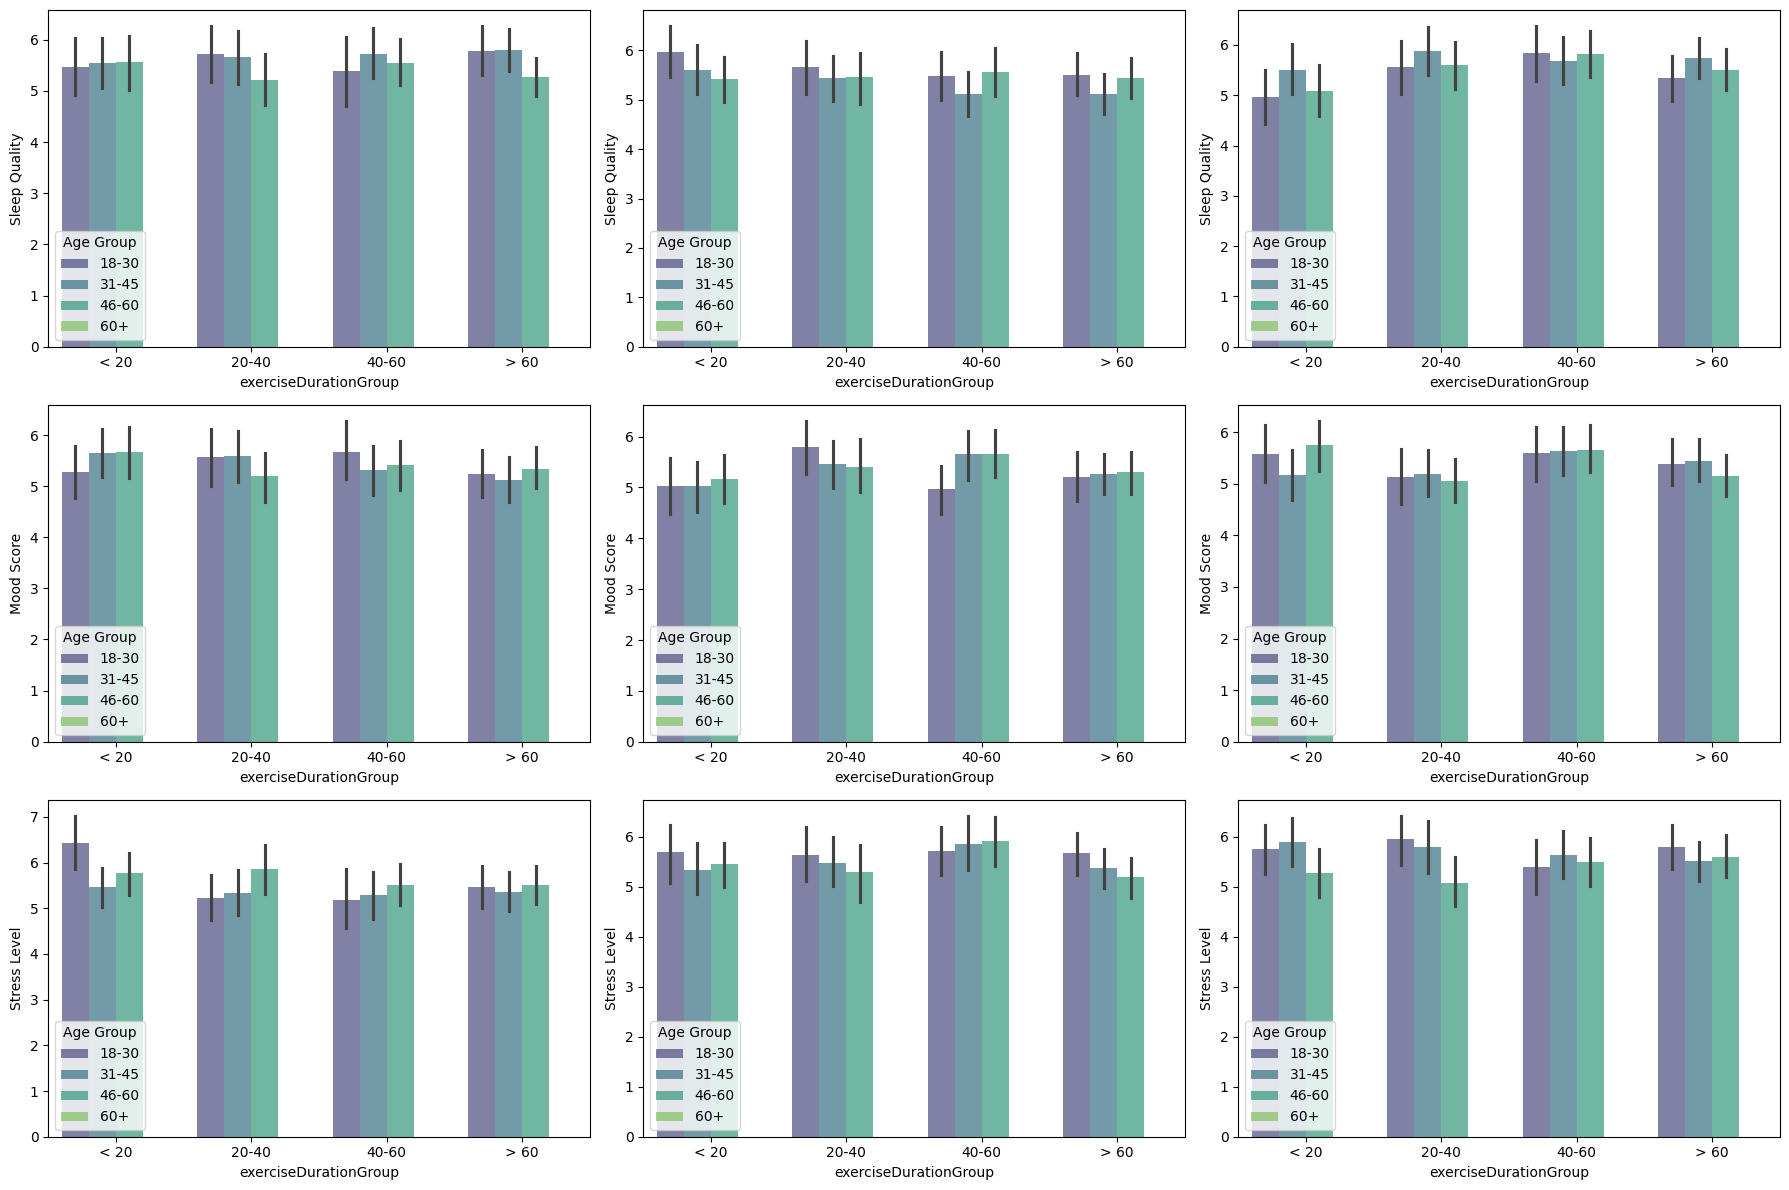

In [ ]:
# Investigate whether Exercises affect sleep metrics 
metrics = ['Sleep Quality', 'Mood Score', 'Stress Level']
genders = df['Gender'].unique()

fig, axes = plt.subplots(nrows=len(metrics), ncols=len(genders), figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    for j, gender in enumerate(genders):
        ax = axes[i * len(genders) + j]
        plot_barplot(
            df=df[df['Gender'] == gender], 
            x='exerciseDurationGroup', 
            y=metric, 
            title=f'{metric} vs Exercise Duration, Gender: {gender}',
            x_label='Exercise Duration',
            y_label=metric,
            legend='Age Group',
            hue='AgeGroup', 
            palette='viridis', 
            alpha=0.7,
            ax=ax
        )

plt.tight_layout()
plt.savefig(os.path.join(output_path, 'exercise_effect.png'))


In [13]:
high_scores = [8, 9, 10]

# Filter the DataFrame based on the high scores
filtered_df = df[
    (df['Productivity Score'].isin(high_scores)) &
    (df['Sleep Quality'].isin(high_scores)) &
    (df['Mood Score'].isin(high_scores)) &
    (df['Stress Level'].isin(high_scores))
]

high_productive_values = filtered_df.groupby(['AgeGroup', 'Gender', 'exerciseDurationGroup'])[['Total Sleep Hours', 'Caffeine Intake (mg)']].agg({
    'Total Sleep Hours': ['mean', 'size'],
    'Caffeine Intake (mg)': ['mean']
}).dropna()

C:\Users\evojt\AppData\Local\Temp\ipykernel_31364\1987294660.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_productive_values = filtered_df.groupby(['AgeGroup', 'Gender', 'exerciseDurationGroup'])[['Total Sleep Hours', 'Caffeine Intake (mg)']].agg({


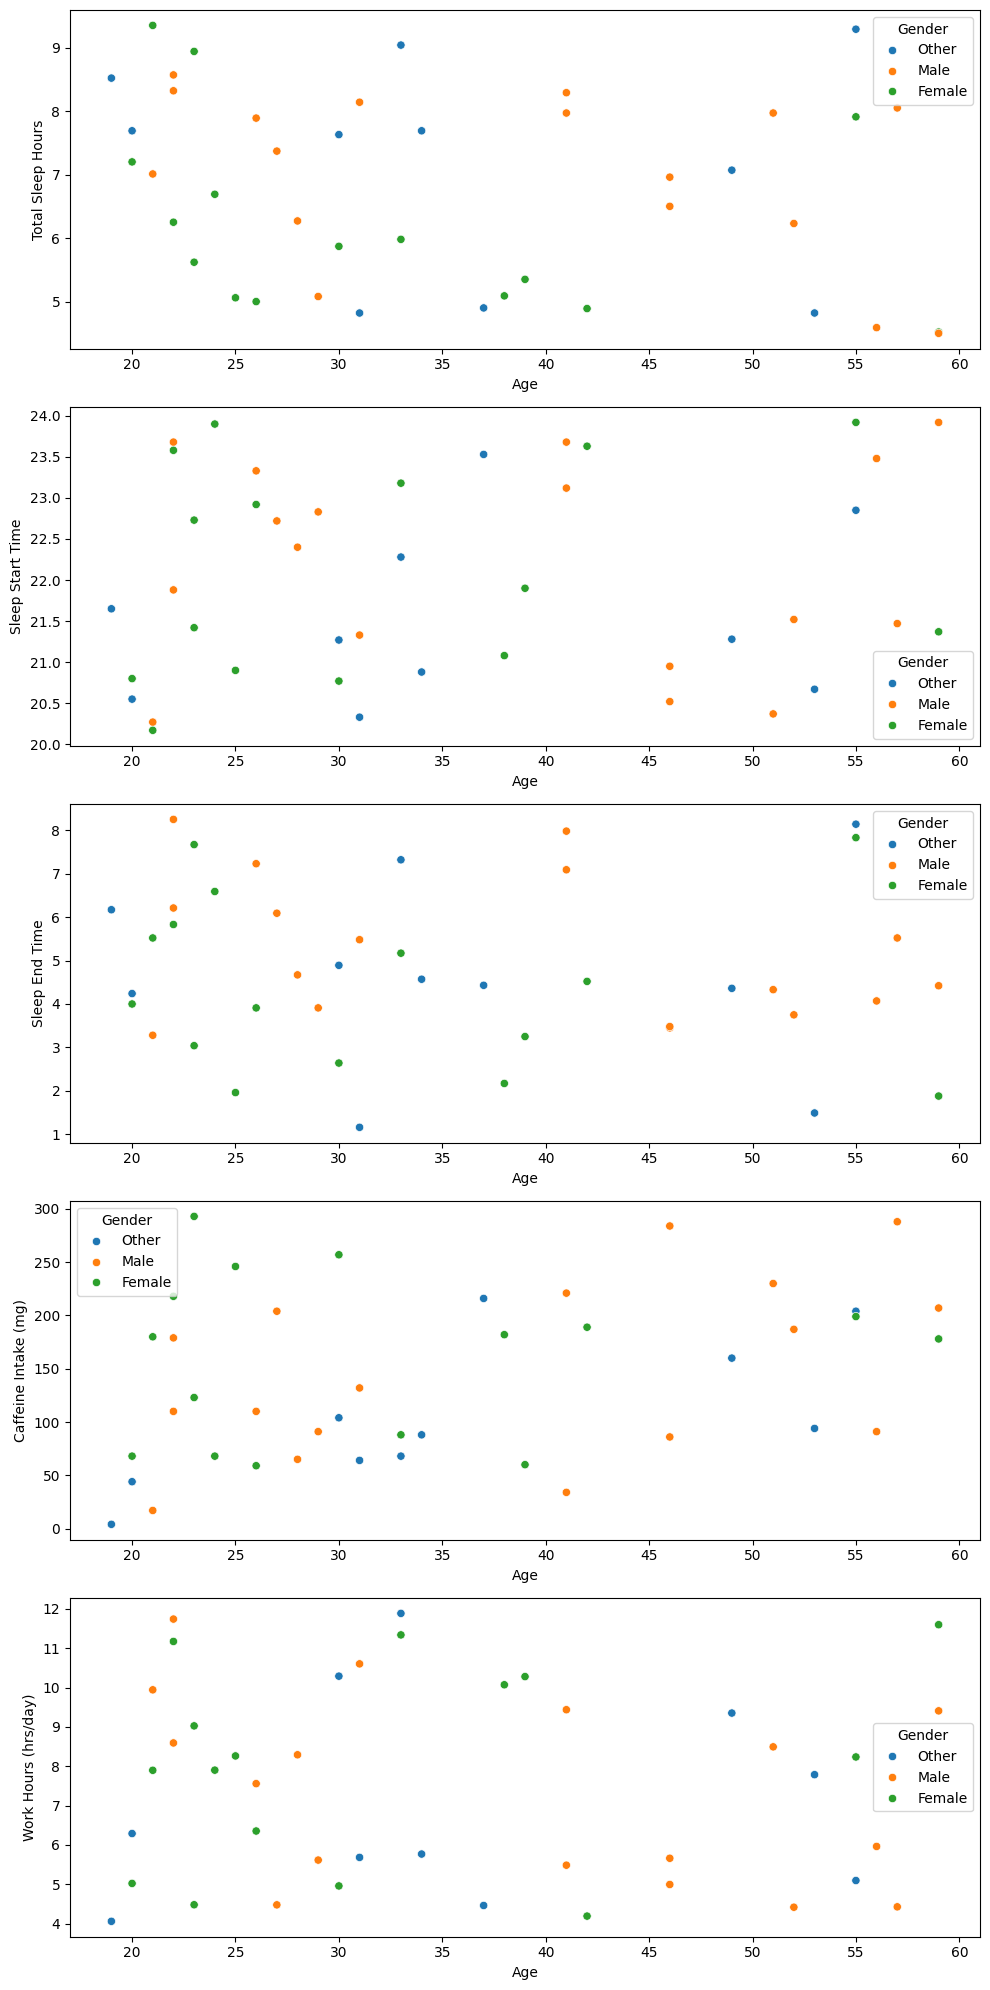

In [ ]:
# Scatter metrics of persons with high scores
metrics = ['Total Sleep Hours','Sleep Start Time', 'Sleep End Time', 'Caffeine Intake (mg)', 'Work Hours (hrs/day)']
fig, axes = plt.subplots(nrows=len(metrics), figsize=(10, 20))

axes = axes.flatten()

for i, metric in enumerate(metrics):
        ax = axes[i]
        plot_scatter(df=filtered_df,
                     x='Age',
                     y=metric,
                     title=f'{metric} for {gender}',
                     x_label='Age',
                     y_label=metric,   
                     ax=ax, 
                     hue='Gender')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'most_productive_persons_scatter.png'))

In [ ]:
# Get mean Scores of the most efficient (and happy) persons in a selection
high_productive_values = filtered_df.groupby(['AgeGroup', 'Gender', 'exerciseDurationGroup'])[['Total Sleep Hours', 'Caffeine Intake (mg)']].agg({
    'Total Sleep Hours': ['mean'],
    'Caffeine Intake (mg)': ['mean']
}).dropna()

high_productive_values

C:\Users\evojt\AppData\Local\Temp\ipykernel_31364\2437878207.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_productive_values = filtered_df.groupby(['AgeGroup', 'Gender', 'exerciseDurationGroup'])[['Total Sleep Hours', 'Caffeine Intake (mg)']].agg({


Total Sleep Hours Caffeine Intake (mg)
                                                   mean                 mean
AgeGroup Gender exerciseDurationGroup                                       
18-30    Female < 20                           9.350000           180.000000
                20-40                          5.877500           147.750000
                > 60                           7.083333           161.333333
         Male   < 20                           6.045000            54.000000
                20-40                          8.105000           110.000000
                40-60                          6.820000           134.500000
                > 60                           8.570000           179.000000
         Other  < 20                           8.520000             4.000000
                > 60                           7.690000            44.000000
31-45    Female < 20                           5.870000           257.000000
                20-40                          5.980000            88.000000
                40-60                          4.890000           189.000000
                > 60                           5.220000           121.000000
         Male   < 20                           7.970000            34.000000
                40-60                          8.140000           132.000000
                > 60                           8.290000           221.000000
         Other  < 20                           6.225000            84.000000
                20-40                          6.295000           152.000000
                40-60                          9.040000            68.000000
46-60    Female 40-60                          6.215000           188.500000
         Male   < 20                           6.230000           187.000000
                20-40                          6.500000           284.000000
                40-60                          5.775000            88.500000
                > 60                           6.840000           241.666667
         Other  < 20                           4.820000            94.000000
                20-40                          7.070000           160.000000
                40-60                          9.290000           204.000000